# Summary

Part 2 of reinforcement learning programming assignment 1.

## TODO

1. DQN.
2. Monte DQN.
3. Linear approx.
4. Evaluation metrics/plots.
5. Adaptive learning rate.
6. Good comments.

# Imports/Setup

In [1]:
import utils
import numpy as np
import matplotlib.pyplot as plt
import performance_logger
import evalutaions
from datetime import datetime
import torch
import os

In [2]:
env = utils.get_env()

/data/users/jupyter-dam724/.local/lib/python3.9/site-packages/gymnasium/envs/registration.py:523: DeprecationWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.deprecation(


*Configuation data for experiments.*

In [3]:
class Config:
    device_pref = 'cuda'
    
    current_time = datetime.now()
    time_string = current_time.strftime("%Y-%m-%d %H:%M:%S")
    direct = f'Runs/{time_string} RL2'

Make directory for all run data.

In [4]:
os.makedirs(Config.direct)

Device setup.

In [5]:
def set_device(device_pref):
    device = None
    
    if device_pref == 'cuda' and torch.cuda.is_available():
        device = torch.device('cuda:1')
        print('Now using GPU.')
    else:
        device = torch.device('cpu')
        if device_pref == 'cuda':
            print('GPU not available, defaulting to CPU.')
        else:
            print('Now using CPU.')
    
    return device

In [6]:
Config.device = set_device(Config.device_pref)

Now using GPU.


In [7]:
utils.device = Config.device

# Linear Fucntion Approximation

...

# Non-linear Function Approximation (DQN)

Train DQN agent using a shallow neural network.

In [8]:
from deep_network import DQNModel
from DQN import DQN

In [9]:
linear_size = 64
state_size = 4
action_size = 2

In [10]:
policy_net = DQNModel(state_size, action_size, linear_size).to(Config.device)
target_net = DQNModel(state_size, action_size, linear_size).to(Config.device)
_ = target_net.load_state_dict(policy_net.state_dict())

In [ ]:
load_trained = False
state_dict_path = ''

In [ ]:
if load_trained:
    utils.load(state_dict, policy_net)

In [11]:
run_title = 'init'

epsilon = 0.9
decay = 0.99998
gamma = 1.0
lr = 1e-5
memory = 20000

episodes = 100000
logger = 1000

In [12]:
print(f'{epsilon} --> {epsilon * (decay ** (episodes/2))} --> {epsilon * (decay ** episodes)}')

0.9 --> 0.3310881861114052 --> 0.12179931886948943


In [13]:
reward_log, time_log = np.zeros(episodes+1), np.zeros(episodes+1)

In [14]:
dqn = DQN(policy_net, target_net, action_size, state_size, env, learning_rate=lr, gamma=gamma, epsilon=epsilon, epsilon_decay=decay, memory=memory)

In [15]:
dqn_rewards = dqn.train(episodes=episodes, logger=logger, LOG_episodes=reward_log, LOG_time=time_log)

Episode 0, Average Reward: 14.00
0.899982
Episode 1000, Average Reward: 21.76
0.8821609859653757
Episode 2000, Average Reward: 28.84
0.8646928551453275
Episode 3000, Average Reward: 31.36
0.8475706199148624
Episode 4000, Average Reward: 33.59
0.830787431014597
Episode 5000, Average Reward: 34.79
0.8143365748109159
Episode 6000, Average Reward: 36.75
0.7982114706103731
Episode 7000, Average Reward: 39.54
0.7824056680272699
Episode 8000, Average Reward: 41.57
0.7669128444033714
Episode 9000, Average Reward: 44.60
0.7517268022786993
Episode 10000, Average Reward: 48.30
0.7368414669124221
Episode 11000, Average Reward: 51.06
0.7222508838528273
Episode 12000, Average Reward: 55.34
0.7079492165554129
Episode 13000, Average Reward: 56.62
0.6939307440481445
Episode 14000, Average Reward: 59.68
0.6801898586429461
Episode 15000, Average Reward: 63.57
0.6667210636925084
Episode 16000, Average Reward: 67.83
0.6535189713915016
Episode 17000, Average Reward: 74.11
0.6405783006213509
Episode 18000, A

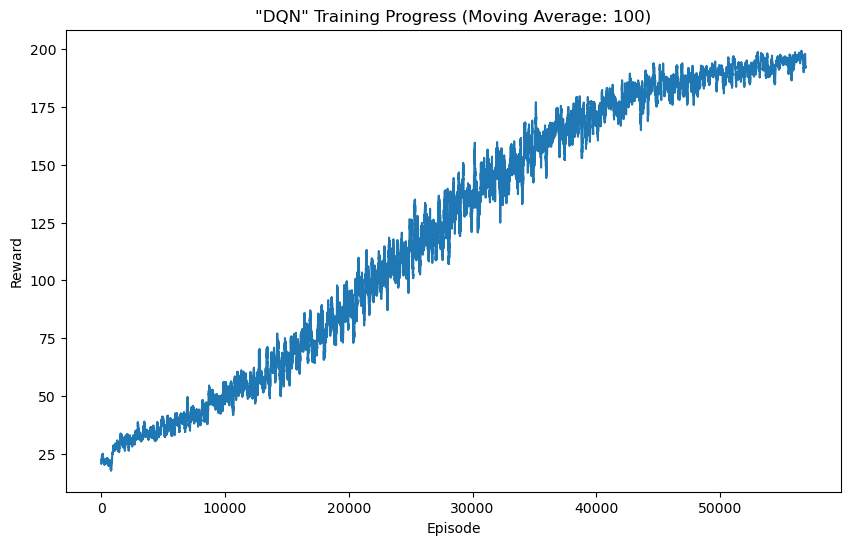

In [20]:
performance_logger.plot_training_progress(dqn_rewards, '"DQN"', 100, f'{Config.direct}/{run_title}_dqn_progress.png')

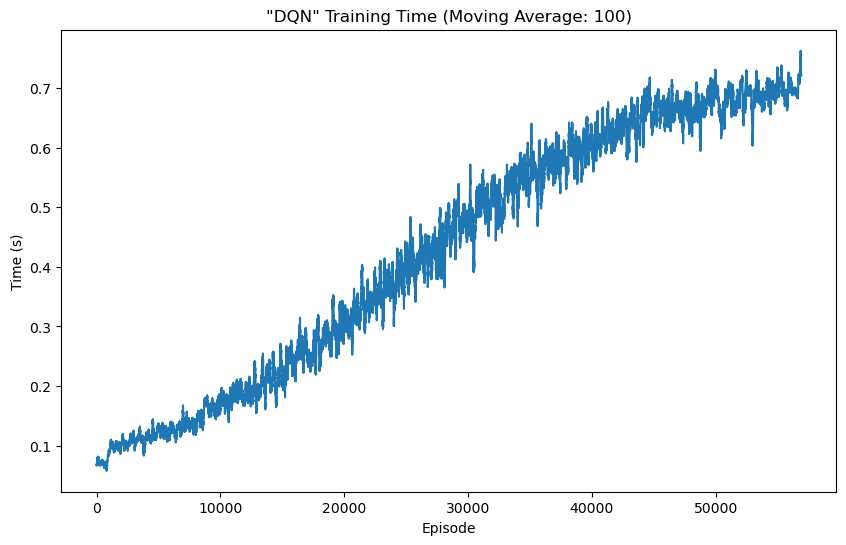

In [30]:
performance_logger.plot_time_progress(time_log[time_log != 0], '"DQN"', 100, f'{Config.direct}/{run_title}_dqn_time.png')

## Log Data

Log data that would be relevent for report.

In [17]:
performance_logger.LOG[f'{run_title}_dqn_reward'] = reward_log
performance_logger.LOG[f'{run_title}_dqn_time'] = time_log

In [18]:
performance_logger.flush_LOG(f'{Config.direct}/LOG')

*Save model.*

In [25]:
torch.save(policy_net.state_dict(), f'{Config.direct}/{run_title}_DQN_model.pth')